<a href="https://colab.research.google.com/github/ctarrington/try-python/blob/master/language-scraps/tuples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from collections import namedtuple
from itertools import islice

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

#Generators
Generators and lists are a little twitchy and the stakes are high

In [29]:
tuple_of_tuples = tuple( (x,y) for x in range(3) for y in range(2) )
print('Not a generator!!')
print(type(tuple_of_tuples), tuple_of_tuples)
print(type(tuple_of_tuples[0]), tuple_of_tuples[0])


Not a generator!!
<class 'tuple'> ((0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1))
<class 'tuple'> (0, 0)


In [30]:
# place the parenthese carefully or else!
pairs = (tuple((x,y)) for x in range(1_000_000_000_000) for y in range(5))
print(pairs)

<generator object <genexpr> at 0x7f4c4825be08>


lazy generation is the bomb! keep running the cell to see more


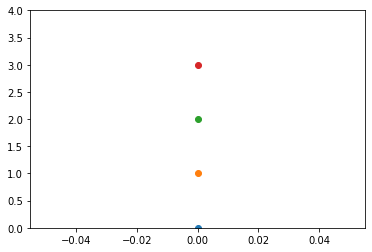

In [31]:
print('lazy generation is the bomb! keep running the cell to see more')
for pair in islice(pairs,4):
  plot(*pair, 'o')
plt.ylim(0, 4)
plt.show()

In [32]:
Pair = namedtuple('Pair', 'x y')
p = Pair(1,4)

npairs = (Pair(x=j,y=k) for j in range(1_000_000_000_000) for k in range(6) )
print(npairs)

<generator object <genexpr> at 0x7f4c408ee2b0>


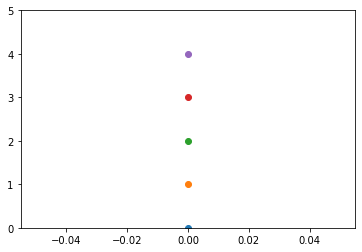

In [33]:
for pair in islice(npairs, 5):
  plot(pair.x, pair.y, 'o')
plt.ylim(0,5)
plt.show()

In [34]:
tuple_odds = (1,3,5,7) 
print('tuple_odds', tuple_odds)

tuple_odds (1, 3, 5, 7)


In [35]:
*one_three, five, seven = tuple_odds
print(one_three, five, seven)

[1, 3] 5 7


## Unpacking is pretty powerful

In [36]:
one, *three_five, seven = tuple_odds
print(one, three_five, seven)

1 [3, 5] 7


In [37]:
lookup = ('ted', (123, 456, 7890))
name, numbers = lookup
print(name)
print(numbers)

name, (code, prefix, number) = lookup
print('%s (%d)-%d-%d' % (name, code, prefix, number))

ted
(123, 456, 7890)
ted (123)-456-7890


# Slicing

In [38]:
tuple_evens = (2,4,6,8,10)
#  *two_four, six, *eight_ten = tuple_evens
#  nope: SyntaxError: two starred expressions in assignment

two_four, six, eight_ten = tuple_evens[:2], tuple_evens[2], tuple_evens[3:]
print(two_four, six, eight_ten)

(2, 4) 6 (8, 10)


# Named Slicing

In [39]:
ODDS = slice(1, 10, 2)

some_numbers = tuple(range(11))
odds = some_numbers[ODDS]
print(odds)



(1, 3, 5, 7, 9)


## Slicing on lazy things produces lazy things!!

In [46]:
lazy_numbers = range(11)
print(type(lazy_numbers), lazy_numbers)

lazy_odds = lazy_numbers[ODDS]
print('lazy_odds', type(lazy_odds), lazy_odds)
print('take', tuple(lazy_odds))

<class 'range'> range(0, 11)
lazy_odds <class 'range'> range(1, 10, 2)
take (1, 3, 5, 7, 9)


In [51]:
# when changing non-contiguous slice the size must match
mutable_numbers = list(range(10))
mutable_numbers[ODDS] = [10,30,50,70,90]
print(mutable_numbers)

[0, 10, 2, 30, 4, 50, 6, 70, 8, 90]


In [58]:
# no worries if contiguous
mutable_numbers = list(range(10))
mutable_numbers[:3] = [20]
print(mutable_numbers)

mutable_numbers = list(range(10))
mutable_numbers[3:5] = []
print(mutable_numbers)


[20, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 5, 6, 7, 8, 9]


## Sorting

In [63]:
words = ['hi', 'there', 'how', 'are', 'you']

# sort works in place
nada = list.sort(words)
print(nada)
print(words)

None
['are', 'hi', 'how', 'there', 'you']


In [65]:
words = ['hi', 'there', 'how', 'are', 'you']

# sorted leaves original untouched
new_list = sorted(words, key=len)
print(new_list)
print(words)

['hi', 'how', 'are', 'you', 'there']
['hi', 'there', 'how', 'are', 'you']
